In [31]:
import osmnx as ox
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
file = 'simplified_nodes_google_maps.csv'

df1 = pd.read_csv(file)
df1.head()

,WKT,name,description
0,POINT (120.9924048 14.5367089),Heritage Hotel,NaN
1,POINT (120.983438 14.535123),SM MOA Globe EDSA,NaN
2,POINT (120.99066 14.52384),City of Dreams,NaN
3,POINT (120.991283 14.50936),Pitx,NaN
4,POINT (120.999887 14.537281),EDSA Taft Avenue,NaN


In [33]:
file = 'simplified_nodes_google_maps.csv'

df1 = pd.read_csv(file)

# Split 'WKT' column into 'Latitude' and 'Longitude', then drop
df1["WKT"] = df1["WKT"].str.extract(r'\(([^()]+)\)')
df1[["Longitude","Latitude"]] = df1["WKT"].str.split(' ',expand=True)
df1.drop(columns=["WKT","description"], inplace=True)

# Change 'lat' and 'lon' columns to float
df1["Latitude"] = round( df1["Latitude"].astype(float), 6)
df1["Longitude"] = round( df1["Longitude"].astype(float), 6)

# Rename column
df1.rename(columns={"name": "Node"}, inplace=True)

df1.head()

,Node,Longitude,Latitude
0,Heritage Hotel,120.992405,14.536709
1,SM MOA Globe EDSA,120.983438,14.535123
2,City of Dreams,120.990660,14.523840
3,Pitx,120.991283,14.509360
4,EDSA Taft Avenue,120.999887,14.537281


In [34]:
len(df1)

144

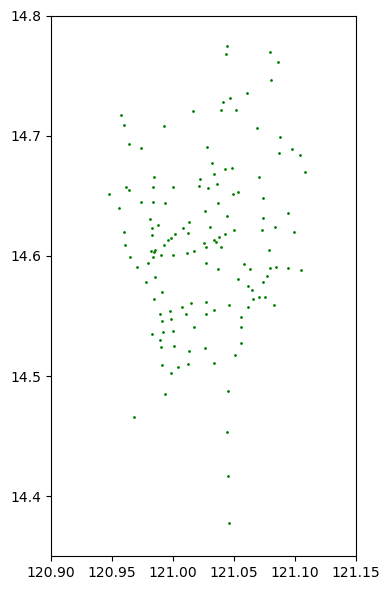

In [35]:
def plot_nodes(df):
    plt.rcParams["figure.figsize"] = [4,6]
    plt.rcParams["figure.autolayout"] = True
    plt.xlim(120.90, 121.15)
    plt.ylim(14.35, 14.80)

    for i in range(0,len(df)):    
        x = df.loc[i, 'Longitude']
        y = df.loc[i, 'Latitude']
        plt.plot(x, y, marker="o", markersize=1, markeredgecolor="green", markerfacecolor="green")
    
    plt.show()

plot_nodes(df1)

### Output: data_nodes.csv

In [36]:
df1["Node_Number"] = range(1, len(df1)+1);
df1.tail()

,Node,Longitude,Latitude,Node_Number
139,Timog Avenue,121.026666,14.637259,140
140,Mindanao Avenue - Fairview,121.051876,14.721359,141
141,EDSA Carousel - Buendia,121.034040,14.555065,142
142,Bagong Silang Market,121.044686,14.774558,143
143,Camarin,121.043917,14.768261,144


In [37]:
# Export Dataframe to file to be read into QGIS
df1.to_csv('data_nodes.csv', index=False)

### Output: data_edges.csv

In [38]:
file = 'simplified_edges_google_maps.csv'

df2 = pd.read_csv(file)
df2.head()

,s,t,time_min,distance_km
0,5Th Avenue - Caloocan,Monumento,5.0,1.4
1,5Th Avenue - Caloocan,A.Mabini Avenue,3.0,1.0
2,5Th Avenue - Caloocan,Abad Santos,5.0,1.6
3,5Th Avenue - Caloocan,Sgt. Rivera,3.0,1.1
4,5Th Avenue Cor. R10,MMDA Navotas Bus Terminal,3.0,1.6


In [39]:
len(df2)

171

In [40]:
def name_to_number(node):
    for i in range(0,len(df1)):
        if df1["Node"][i] == node:
            number = df1["Node_Number"][i]
            return number

df2["s_Node_Number"] = df2["s"].apply(name_to_number)
df2["t_Node_Number"] = df2["t"].apply(name_to_number)
df2.tail()

,s,t,time_min,distance_km,s_Node_Number,t_Node_Number
166,SM North EDSA,Veterans Memorial Medical Center,8.0,3.70,113,112
167,Tandang Sora - Congressional,Visayas Avenue,2.0,0.65,117,116
168,Zabarte Road,Camarin,14.0,4.20,102,144
169,Bagong Silang Market,Camarin,3.0,0.70,143,144
170,Novaliches Terminal,Zabarte Road,4.0,1.00,107,102


In [41]:
# Check for NAN values
df1.isna().sum()

Node           0
Longitude      0
Latitude       0
Node_Number    0
dtype: int64

In [42]:
# Check for NAN values
df2.isna().sum()

s                0
t                0
time_min         0
distance_km      0
s_Node_Number    0
t_Node_Number    0
dtype: int64

In [43]:
# Export Dataframe to file to be read into QGIS
df2.to_csv('data_edges.csv', index=False)

In [44]:
# Terminal Nodes
list_terminal_nodes = []

terminal_nodes = (['SM MOA Globe EDSA','Pitx','Alabang','Monumento','Malanday','Centris Station (EDSA / Quezon Avenue)',
                   'SM North EDSA','Malaria','GMA-Kamuning MRT','EDSA Taft Avenue','Northview','Pasig Palengke','Kalentong',
                   'SM City East Ortigas','SM Fairview','Nangka','Sta. Lucia East Grand Mall Cainta','Cubao','Doroteo Jose - Recto',
                   'Buendia','Gilmore','Glorietta 5','SM Center Muntinlupa','Sucat Exit','Taguig District Hospital / FTI',
                   'Magallanes Bus Stop','Gil Puyat Avenue','Market Market','Roosevelt - Quezon','Novaliches Terminal',
                   'Bagong Silang Market','VGC','MMDA Navotas Bus Terminal'])

for node in terminal_nodes:
    b = name_to_number(node)
    list_terminal_nodes.append(b)

list_terminal_nodes

[2,
 4,
 7,
 34,
 39,
 94,
 113,
 106,
 95,
 5,
 100,
 58,
 66,
 83,
 103,
 119,
 121,
 126,
 43,
 47,
 72,
 51,
 8,
 9,
 17,
 19,
 21,
 55,
 114,
 107,
 143,
 123,
 29]

In [45]:
len(list_terminal_nodes)

33

In [46]:
def number_to_name(node):
    for i in range(0,len(df1)):
        if df1["Node_Number"][i] == node:
            name = df1["Node"][i]
            return name

### Time and Distance Matrices

In [47]:
s_list = list(df2["s_Node_Number"])
t_list = list(df2["t_Node_Number"])
dist_list = list(df2["distance_km"])
time_list = list(df2["time_min"])

In [48]:
rows = len(df1)
cols = len(df1)
 
time_mat = [[0 for _ in range(cols)] for _ in range(rows)]
#print(f'matrix of dimension {rows} x {cols} is {time_mat}')

distance_mat = [[0 for _ in range(cols)] for _ in range(rows)]
#print(f'matrix of dimension {rows} x {cols} is {distance_mat}')

In [49]:
def time_and_distance_matrices(s_list,t_list,dist_list,time_list):

    for k in range(0, len(df2)):
        i = s_list[k]-1
        j = t_list[k]-1
        distance_mat[i][j] = dist_list[k]
        distance_mat[j][i] = dist_list[k]
        time_mat[i][j] = time_list[k]
        time_mat[j][i] = time_list[k]

time_and_distance_matrices(s_list,t_list,dist_list,time_list)

In [50]:
print(f'matrix of dimension {rows} x {cols} is {time_mat}')

matrix of dimension 144 x 144 is [[0, 4.0, 0, 6.0, 6.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [4.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5.0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [51]:
print(f'matrix of dimension {rows} x {cols} is {distance_mat}')

matrix of dimension 144 x 144 is [[0, 1.0, 0, 3.1, 0.9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.4, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 2.3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [52]:
# Check if the time_mat and distance_mat are symmetric

import numpy as np

tol = 0.000001
def is_symmetric(a):
    return (np.abs(a - a.T) <= tol).all()

array_time_mat = np.array(time_mat)
array_distance_mat = np.array(distance_mat)
print(is_symmetric(array_time_mat))
print(is_symmetric(array_distance_mat))

True
True


In [53]:
len(df1)

144

### Exporting Time and Distance Matrices for Matlab

In [54]:
import scipy.io

size = len(df1)
time_arr = array_time_mat
time_arr = time_arr.reshape((size,size))
# save to .mat file with variable time_mat
scipy.io.savemat('final_time.mat', {'array': time_mat})

distance_arr = array_distance_mat
distance_arr = distance_arr.reshape((size,size))
# save to .mat file with variable distance_mat
scipy.io.savemat('final_distance.mat', {'array': distance_mat})